<a href="https://colab.research.google.com/github/daniel-usp/MachineLearning/blob/main/01-Regress%C3%A3o/Regress%C3%A3o_Exemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modelo de Regressão Linear

## O que é Regressão Linear?

A **Regressão Linear** é um método estatístico usado para modelar a relação entre uma variável dependente (Y) e uma ou mais variáveis independentes (X). É amplamente utilizada em diversas áreas, principalmente em negócios, para previsão e inferência.

## Exemplos na Área de Negócios

1. **Previsão de Vendas**: Empresas utilizam regressão linear para estimar vendas futuras com base em variáveis como gastos com publicidade, preço do produto e condições econômicas.
2. **Análise de Risco de Crédito**: Bancos aplicam modelos de regressão linear para avaliar a probabilidade de inadimplência de clientes, considerando fatores como histórico de crédito e renda.

## Gráfico de Dispersão

Um **gráfico de dispersão** é usado para visualizar a relação entre as variáveis. Por exemplo, ao plotar gastos com publicidade (X) contra vendas (Y), um padrão linear sugere uma relação positiva: quanto mais se gasta em publicidade, mais se vende.

```python
import matplotlib.pyplot as plt

# Exemplo de dados
x = [1, 2, 3, 4, 5] # Gastos com publicidade
y = [2, 4, 5, 4, 5] # Vendas

plt.scatter(x, y)
plt.xlabel('Gastos com Publicidade')
plt.ylabel('Vendas')
plt.title('Gráfico de Dispersão entre Publicidade e Vendas')
plt.show()
```
## Conceitos de Valor-P e R2

- **Valor-P**: Indica a probabilidade de que os resultados do seu modelo sejam devidos ao acaso. Um valor-P baixo (geralmente menor que 0,05) sugere que a variável independente tem um efeito significativo sobre a variável dependente.

- **R²** (Coeficiente de Determinação): Mede o quão bem a linha de regressão se ajusta aos dados. Varia de 0 a 1, onde um R² mais próximo de 1 indica que o modelo explica uma grande parte da variabilidade dos dados.


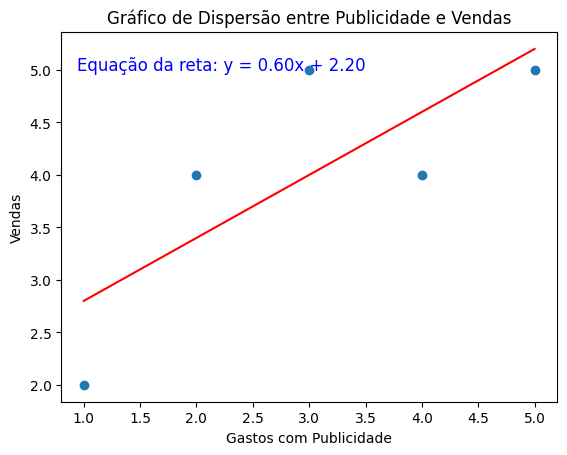

In [4]:
import matplotlib.pyplot as plt

# Exemplo de dados
x = [1, 2, 3, 4, 5] # Gastos com publicidade
y = [2, 4, 5, 4, 5] # Vendas

plt.scatter(x, y)
plt.xlabel('Gastos com Publicidade')
plt.ylabel('Vendas')
plt.title('Gráfico de Dispersão entre Publicidade e Vendas')
plt.show()


In [ ]:
import pandas as pd

#Leitura do Banco de Dados
dados = pd.read_excel('https://github.com/daniel-usp/MachineLearning/raw/main/01-Regress%C3%A3o/custos.xlsx')

nome_y = "Custo"
y = dados[nome_y]
X = dados.drop(nome_y, axis =1)


,Embalagens,Toneladas,Sazonalidade
0,2658,47,0
1,2730,33,0
2,2451,59,0
3,1509,60,1
4,2075,59,0
5,2936,62,1
6,2342,72,0
7,2196,51,0
8,2318,38,0
9,1679,44,0


In [ ]:
import statsmodels.api as sm

# Como os dados já estão definidos na variável 'dados', continuaremos daqui:

# Adicionando uma constante ao modelo para o intercepto
X = sm.add_constant(X)

# Criar e treinar o modelo de regressão linear usando statsmodels
modelo_statsmodels = sm.OLS(y, X).fit()

# Imprimir o sumário do relatório de análise
sumario = modelo_statsmodels.summary()
print(sumario)



                            OLS Regression Results                            
Dep. Variable:                  Custo   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     262.5
Date:                Fri, 15 Dec 2023   Prob (F-statistic):           2.03e-18
Time:                        00:50:14   Log-Likelihood:                -305.04
No. Observations:                  30   AIC:                             616.1
Df Residuals:                      27   BIC:                             620.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.489e+04   7854.543      4.442      0.0

In [ ]:
# Extrair a tabela de resultados
resultados = sumario.tables[1].data

# Identificar variáveis com valor-p acima de 0.05
variaveis_nao_significativas = []
for linha in resultados[1:]:  # Ignorar a primeira linha que é o cabeçalho
    nome_variavel = linha[0]
    valor_p = float(linha[4])
    if valor_p > 0.05:
        variaveis_nao_significativas.append(nome_variavel)

print(variaveis_nao_significativas)

[]


In [ ]:
import statsmodels.api as sm

# Como os dados já estão definidos na variável 'dados', continuaremos daqui:

# Separar os dados em variáveis dependentes e independentes
y = dados["Vendas"]
X = dados["Instagram"]

# Adicionando uma constante ao modelo para o intercepto
X = sm.add_constant(X)

# Criar e treinar o modelo de regressão linear usando statsmodels
modelo_statsmodels = sm.OLS(y, X).fit()

# Preparando novos dados para previsão
novos_dados = sm.add_constant(pd.DataFrame({'Instagram': [10, 8, 7, 12]}))

# Realizar previsões com o modelo treinado
previsoes_vendas = modelo_statsmodels.predict(novos_dados)
previsoes_vendas



0    350.640107
1    322.287377
2    308.111012
3    378.992838
dtype: float64